# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [27]:
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [28]:
len(x_train_image)
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [29]:
!pip install matplotlib==3.3.0
!pip install seaborn

In [30]:
import matplotlib.pyplot as plt
def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

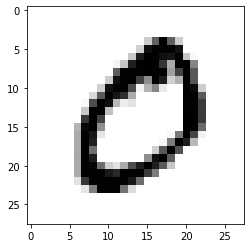

In [31]:
plot_image(x_train_image[1])

In [32]:
x_train_image[0].shape

(28, 28)

In [33]:
x_train_image.shape

(60000, 28, 28)

In [34]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [35]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [36]:
y_train_label.shape

(60000,)

In [37]:
y_train_label[0]

5

In [38]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [39]:
y_Train_OneHot.shape

(60000, 10)

In [40]:
y_Train_OneHot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 建立模型

In [41]:
from keras.models import Sequential
from keras.layers import Dense

In [42]:
model = Sequential()

In [43]:
#If your input shape has only one dimension, you don't need to give it as a tuple, you give input_dim as a scalar number.
#So, in your model, where your input layer has 3 elements, you can use any of these two:
#input_shape=(3,) -- The comma is necessary when you have only one dimension
#input_dim = 3

In [44]:
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', #權重初始化方法
                activation='relu'))

In [45]:
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [46]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [52]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

In [53]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.0301 - acc: 0.9915 - val_loss: 0.0795 - val_acc: 0.9755
Epoch 2/10
 - 0s - loss: 0.0231 - acc: 0.9944 - val_loss: 0.0802 - val_acc: 0.9768
Epoch 3/10
 - 0s - loss: 0.0187 - acc: 0.9956 - val_loss: 0.0764 - val_acc: 0.9777
Epoch 4/10
 - 0s - loss: 0.0153 - acc: 0.9966 - val_loss: 0.0794 - val_acc: 0.9781
Epoch 5/10
 - 0s - loss: 0.0121 - acc: 0.9981 - val_loss: 0.0800 - val_acc: 0.9774
Epoch 6/10
 - 0s - loss: 0.0096 - acc: 0.9986 - val_loss: 0.0793 - val_acc: 0.9771
Epoch 7/10
 - 0s - loss: 0.0078 - acc: 0.9991 - val_loss: 0.0802 - val_acc: 0.9778
Epoch 8/10
 - 0s - loss: 0.0070 - acc: 0.9989 - val_loss: 0.0826 - val_acc: 0.9777
Epoch 9/10
 - 0s - loss: 0.0059 - acc: 0.9992 - val_loss: 0.0838 - val_acc: 0.9773
Epoch 10/10
 - 0s - loss: 0.0044 - acc: 0.9996 - val_loss: 0.0873 - val_acc: 0.9778


# 以圖形顯示訓練過程

In [54]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

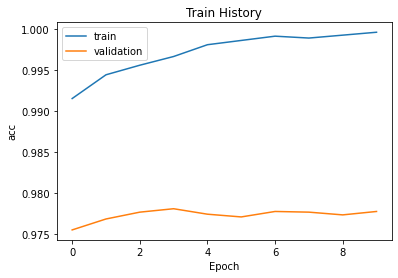

In [55]:
show_train_history(train_history,'acc','val_acc')

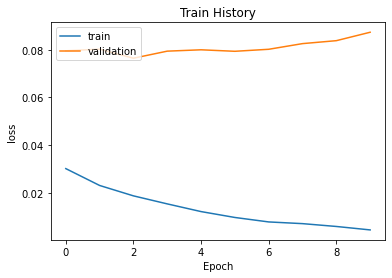

In [56]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [57]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 10us/step

accuracy= 0.9779000282287598


# 進行預測

In [58]:
prediction=model.predict_classes(x_Test)

In [59]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label=" +str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

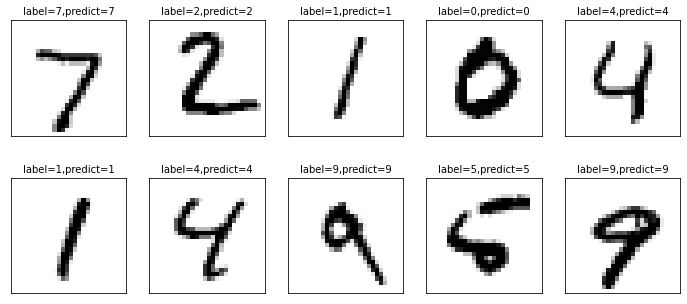

In [61]:
plot_images_labels_prediction(x_test_image,y_test_label,
                              prediction,idx=0)

# confusion matrix

In [62]:
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,970,1,1,0,1,1,2,1,1,2
1,0,1128,3,1,0,1,1,0,1,0
2,8,1,1002,3,0,0,3,9,5,1
3,0,0,2,990,0,4,0,4,1,9
4,2,1,1,1,946,0,6,3,2,20
5,2,0,0,8,1,868,4,2,3,4
6,6,2,1,1,2,5,941,0,0,0
7,1,4,7,1,0,0,0,1006,1,8
8,6,1,2,6,2,3,2,3,938,11


In [63]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [64]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2597,5,3
3902,5,3
4360,5,3
5937,5,3
5982,5,3


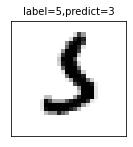

In [65]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=340,num=1)

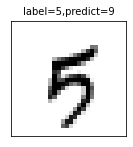

In [66]:
plot_images_labels_prediction(x_test_image,y_test_label
                              ,prediction,idx=1289,num=1)